In [ ]:
# Loop for saving transcript expression data.
batches = {800:1270}
from tqdm import tqdm
# Subselect all samples with breast tissue, primary tuno
df_phenotype = pd.read_csv("Data/TcgaTargetGTEX_phenotype.txt", delimiter="\t")
df2 = df_phenotype[df_phenotype['_primary_site'] == 'Breast']
cols = df2[df2["_sample_type"].isin(["Primary Tumor", "Normal Tissue"])]["sample"].tolist()
i = 0

for start, end in tqdm(batches.items()):
    print("Go")
    i += 3
    df = pd.read_csv("Data/TcgaTargetGtex_rsem_isoform_tpm", delimiter="\t", usecols=['sample'] + cols[start:])#end
    
    # Set index and transpose
    df = df.set_index("sample").T
    
    # Make label column
    df["label"] = df.index.astype(str).str[0]
    
    # Set labels to 0 and 1
    df.label.replace({"T": 1, "G": 0}, inplace=True)
    
    # Put the label column on first col index
    cols = df.columns.tolist()
    cols = [cols[-1]]+cols[:-1] # or whatever change you need
    df = df.reindex(columns=cols)
    
    # Save dataframe
    df.to_csv("breast_normal_primary_{}-3_1.0.csv".format(str(i)))
    print("Finish\n")

In [ ]:
# Old boruta - always crashed at the end
def boruta_selection(self, X_train_smote, y_train_smote, X_test, y_test, alpha, max_iter, perc, random_state, loop_count):
        """
        Iterative Boruta Selection, returns selected features.
        """
        cols1 = X_train_smote.columns

        for i in range(loop_count):
            from sklearn.metrics import f1_score # import again because it works like that :)

          # Random Forests for Boruta

            rf_boruta = RandomForestClassifier(n_jobs=-1, random_state=SEED)

          # Perform Boruta

            boruta = BorutaPy(rf_boruta, n_estimators='auto', verbose=2, alpha=alpha, max_iter=max_iter, perc=perc, random_state=random_state)
            print(X_train_smote.shape)
            boruta.fit(X_train_smote.values, y_train_smote)

            # Select features and fit Logistic Regression

            cols1 = X_train_smote.columns[boruta.support_]
            est_boruta = LogisticRegression(random_state=SEED)
            est_boruta.fit(X_train_smote[cols1], y_train_smote)

            scores = cross_val_score(est_boruta, X_train_smote[cols1], y_train_smote, cv=5)

            # F1 Score
            f1_score = f1_score(y_test, est_boruta.predict(X_test[cols1]))

            print('Number of features selected: {}'.format(len(cols1)))
            print("F1 score {:.5f}".format(f1_score))
            print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
            print('selected cols:', cols1)

            X_train_smote = X_train_smote[cols1]
            return {"Boruta":cols1}

In [3]:
# Model Accuracies
"""
Evaluating Output/Chunk_Breast.csv
Accuracy of GBM: 0.994
Accuracy of RFE: 0.928
Accuracy of Elastic Net: 0.950
Accuracy of Boruta: 1.000 (+/- 0.000)
Accuracy of Boruta Tree: 1.000
Finished in 14.3 min

Evaluating Output/Chunk_LungAdenocarcinoma_Lung.csv
Accuracy of GBM: 1.000
Accuracy of RFE: 0.972
Accuracy of Elastic Net: 0.969
Accuracy of Boruta: 0.999 (+/- 0.006)
Accuracy of Boruta Tree: 1.000
Finished in 8.3 min

Evaluating Output/Chunk_LungSquamousCellCarcinoma_Lung.csv
Accuracy of GBM: 0.992
Accuracy of RFE: 0.972
Accuracy of Elastic Net: 0.976
Accuracy of Boruta: 1.000 (+/- 0.000)
Accuracy of Boruta Tree: 0.996
Finished in 7.4 min

Evaluating Output/Chunk_Skin.csv
Accuracy of GBM: 1.000
Accuracy of RFE: 0.979
Accuracy of Elastic Net: 0.981
Accuracy of Boruta: 1.000 (+/- 0.000)
Accuracy of Boruta Tree: 1.000
Finished in 6.6 min

Evaluating Output/Chunk_Thyroid_ThyroidGland.csv
Accuracy of GBM: 0.996
Accuracy of RFE: 0.960
Accuracy of Elastic Net: 0.964
Accuracy of Boruta: 1.000 (+/- 0.000)
Accuracy of Boruta Tree: 0.996
Finished in 5.7 min""";

In [4]:
#Integration of Intogen Data
"""
def add_intogen_to_dict(self, path, dict_list):
        
        Add a dictionary with Intogen genes and corresponding Mutation Count
        
        #path = "Data/Intogen_Data/Lung_Adenocarcinoma_LUAD_TCGA.tsv"
        intogen_df = pd.read_csv(path, delimiter = "\t")
        importances = intogen_df["MUTS_PAM_SAMPLES"].to_list()
        intogen_genes = {"Intogen":[intogen_df["GENE"].to_list(), importances]}
        dict_list = {**dict_list, **intogen_genes}
        
        return dict_list""";

In [ ]:
#ordered_columns = ['Total Count', 'Cosmic', 'Gradient Boost Classifier', 'Recursive Feature Elimination', 'Elastic Net', 'Boruta Tree',  'Importances: Gradient Boost Classifier','Importances: Recursive Feature Elimination','Importances: Elastic Net', 'Importances: Boruta Tree','Importances: Cosmic']
        #results = results[ordered_columns]

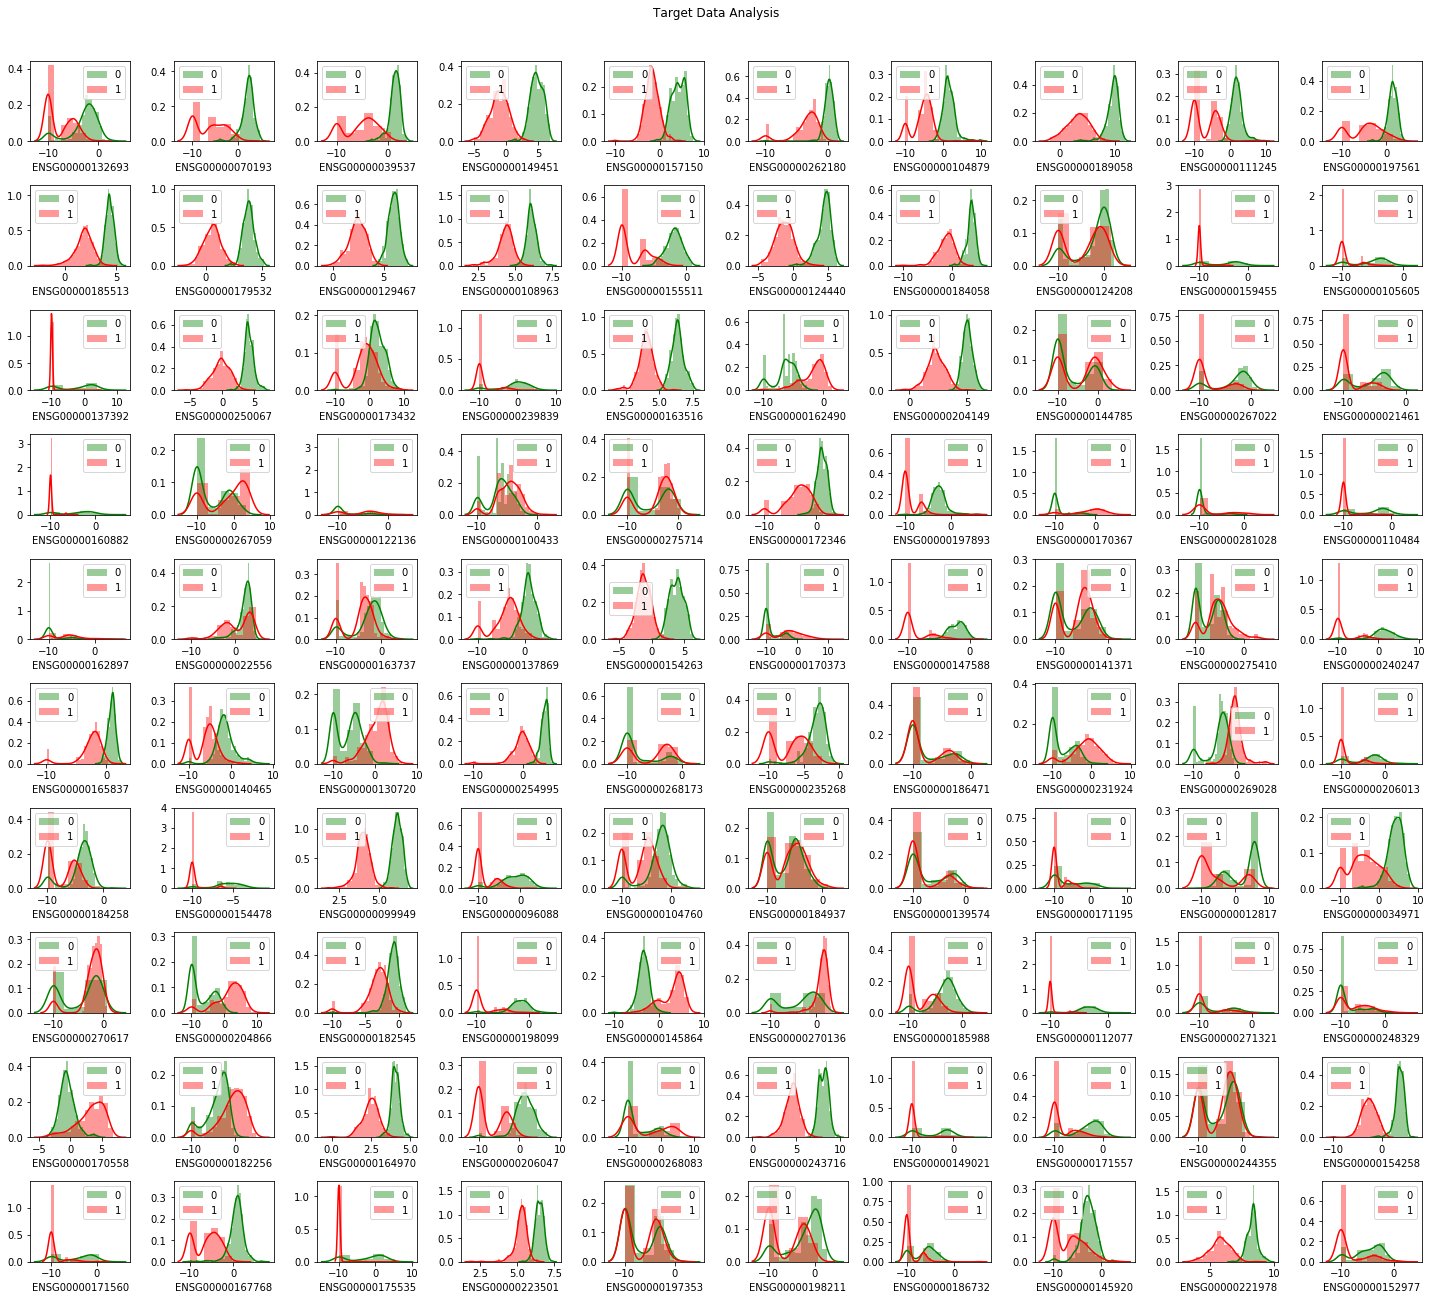

In [35]:
FS.visualize_selected_features(X_train, y_train, sel_feat)

In [1]:
# Model Score Barplot
def model_barplot(self, model_scores):
    """
    Barplot with score (overlaps with Intogen)
    """
    fig, ax = plt.subplots(figsize = (17,10))

    sns.barplot(x = model_scores.index, y = model_scores["Score"], ax=ax)
    ax.set(title = "Model Scores")